## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, # 將 Epoch 設定成 500
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.2632 - acc: 0.1494 - val_loss: 2.2132 - val_acc: 0.1851
Epoch 2/500
50000/50000 [==============================] - 5s 105us/step - loss: 2.1761 - acc: 0.2083 - val_loss: 2.1448 - val_acc: 0.2327
Epoch 3/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.1158 - acc: 0.2437 - val_loss: 2.0928 - val_acc: 0.2615
Epoch 4/500
50000/50000 [==============================] - 6s 126us/step - loss: 2.0703 - acc: 0.2679 - val_loss: 2.0528 - val_acc: 0.2825
Epoch 5/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.0342 - acc: 0.2859 - val_loss: 2.0195 - val_acc: 0.2954
Epoch 6/500
50000/50000 [==============================] - 6s 111us/step - loss: 2.0045 - acc: 0.2996 - val_loss: 1.9920 - val_acc: 0.3075
Epoch 7/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.9792 - acc: 0.3093 - val_loss: 1.

50000/50000 [==============================] - 6s 111us/step - loss: 1.5162 - acc: 0.4730 - val_loss: 1.5467 - val_acc: 0.4568
Epoch 118/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.5144 - acc: 0.4732 - val_loss: 1.5439 - val_acc: 0.4596
Epoch 119/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.5124 - acc: 0.4738 - val_loss: 1.5396 - val_acc: 0.4613
Epoch 120/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5111 - acc: 0.4731 - val_loss: 1.5466 - val_acc: 0.4569
Epoch 121/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.5095 - acc: 0.4750 - val_loss: 1.5368 - val_acc: 0.4612
Epoch 122/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.5075 - acc: 0.4754 - val_loss: 1.5370 - val_acc: 0.4608
Epoch 123/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.5051 - acc: 0.4768 - val_loss: 1.5385 - val_acc: 0.4583
Epoch 124/500
50000/50000 [=

50000/50000 [==============================] - 5s 103us/step - loss: 1.3408 - acc: 0.5320 - val_loss: 1.4345 - val_acc: 0.4925
Epoch 234/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.3398 - acc: 0.5322 - val_loss: 1.4271 - val_acc: 0.4979
Epoch 235/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3386 - acc: 0.5327 - val_loss: 1.4235 - val_acc: 0.4975
Epoch 236/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3369 - acc: 0.5334 - val_loss: 1.4332 - val_acc: 0.4944
Epoch 237/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.3361 - acc: 0.5336 - val_loss: 1.4304 - val_acc: 0.4926
Epoch 238/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.3345 - acc: 0.5335 - val_loss: 1.4317 - val_acc: 0.4927
Epoch 239/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.3335 - acc: 0.5339 - val_loss: 1.4207 - val_acc: 0.4971
Epoch 240/500
50000/50000 [==

50000/50000 [==============================] - 5s 102us/step - loss: 1.2049 - acc: 0.5778 - val_loss: 1.3774 - val_acc: 0.5148
Epoch 350/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.2052 - acc: 0.5774 - val_loss: 1.3600 - val_acc: 0.5182
Epoch 351/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2033 - acc: 0.5795 - val_loss: 1.3587 - val_acc: 0.5229
Epoch 352/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2015 - acc: 0.5776 - val_loss: 1.3602 - val_acc: 0.5232
Epoch 353/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.2023 - acc: 0.5790 - val_loss: 1.3724 - val_acc: 0.5127
Epoch 354/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.2003 - acc: 0.5799 - val_loss: 1.4000 - val_acc: 0.5052
Epoch 355/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.1996 - acc: 0.5794 - val_loss: 1.3879 - val_acc: 0.5104
Epoch 356/500
50000/50000 [=

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



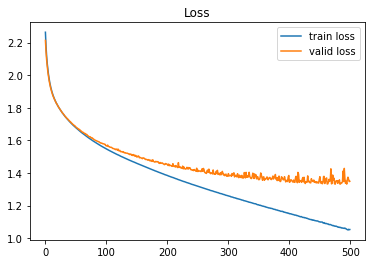

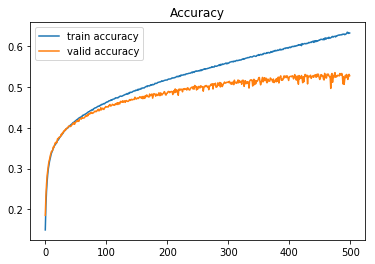

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()